In [4]:
if (!require(survRM2)) install.packages('survRM2')
library('survRM2') 
if (!require(mvtnorm)) install.packages('mvtnorm')
library('mvtnorm')
if (!require(survival)) install.packages('survival')
library('survival')
if (!require(nph)) install.packages('nph')
library('nph')
if (!require(foreach)) install.packages("foreach")
library('foreach') 
if (!require(doParallel)) install.packages("doParallel")
library('doParallel')
if (!require(ggplot2)) install.packages("ggplot2")
library('ggplot2')
if (!require(cowplot)) install.packages("cowplot")
library('cowplot')
library('simtrial')  # need to be installed from Github

n_cores <- detectCores()
cluster <- makeCluster(16) # How many cores we use
registerDoParallel(cluster)
# multi thread
clusterEvalQ(cluster,
  {
  library("survRM2")
  library("mvtnorm")
  library("survival")
  library("nph")
  library("simtrial")
  library("foreach")
  })

source('/home/r27user6/RMST_Code/Function.R')
clusterExport(cluster, "expo_gen_2stages")


[[1]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[2]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[3]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[4]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[5]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[6]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[7]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[8]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[9]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[10]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[11]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[12]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[13]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[14]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[15]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[16]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"

# Piecewice exponential distribution 

##  Early Difference

### <span style="color:yellow">with a hazard ratio of 0.67 until 15 months and then a hazard ratio of 1.2 onward.
#### According to Eaton 2020 (https://doi.org/10.1177/1740774520905563) simulations 
#### <span style="color:yellow"> All test in this paper are 2 sided test


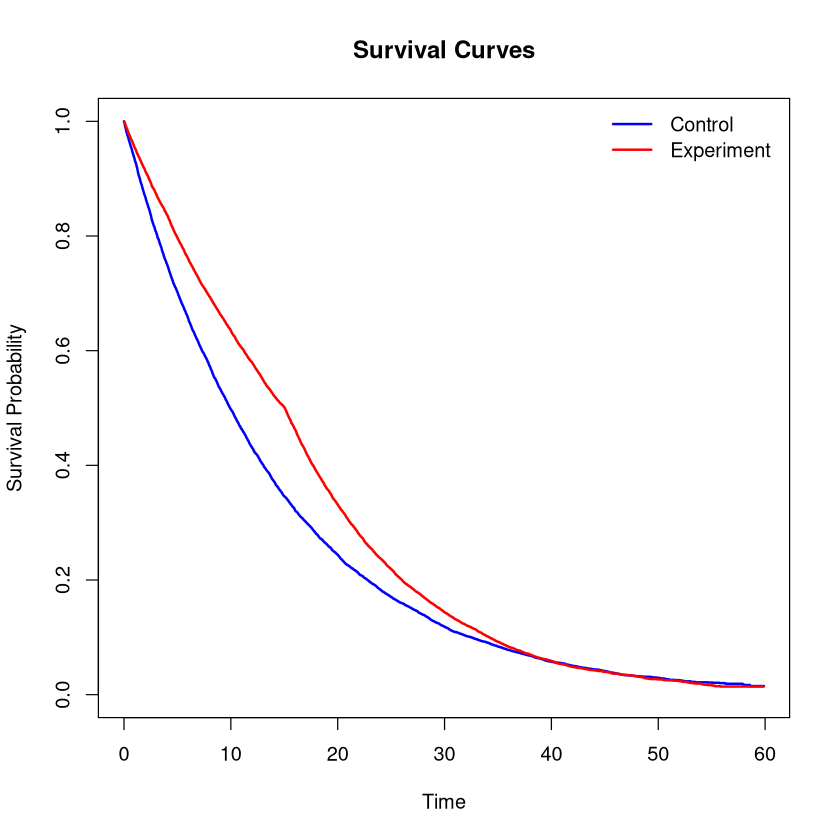

In [31]:
median_con <- 10 #month
lambda_H0 <- log(2)/median_con
HR1 <- 0.67
HR2 <- 1.2
sim_size <- 10000 
acc_time <- 24
cen_time <- 36
n <- 100  # Fix total sample size
interim <- 0
change_time <- 15
set.seed(2024)

data_C <- expo_gen_2stages(N = 10000, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                          arm = 0, interim = interim)
data_E <- expo_gen_2stages(N = 10000, acc_time = acc_time, lambda = lambda_H0, dist = 'pcw_exp', cen_time = cen_time,
                          HR1 = HR1, HR2 = HR2, change_time = change_time, arm = 1, interim = interim)
pre_data <- rbind(data_C[ , c(4,5,1)], data_E[ , c(4,5,1)])

fit <- survfit(Surv(pre_data[,1], pre_data[,2]) ~ pre_data[,3])
plot(fit, col = c("blue", "red"), lwd = 2, xlab = "Time", ylab = "Survival Probability", main = "Survival Curves")
legend("topright", legend = c("Control", "Experiment"), col = c("blue", "red"), lwd = 2, bty = "n")

### Scenario4 one stage two sided log rank test and RMST (interim = 0)
### <span style="color:yellow"> In the paper, P288 table1 logrank power 0.211, RMST power 0.294

In [32]:
data_C4 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                            arm = 0, interim = 0)[ , c(4,5,1)]

data_E4 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'pcw_exp', cen_time = cen_time,
                            HR1 = HR1, HR2 = HR2, change_time = change_time, arm = 1, interim = 0)[ , c(4,5,1)]
                          
power_lr <- log_rank_sim(data_C = data_C4, data_E = data_E4, sim_size = sim_size,
                        n = 100, alpha = 0.05, sided = 'two_sided')
cat('The power of two-sided log rank test here is:', power_lr)
RMST_sim_test(n = 100, data_E = data_C4, data_C = data_E4, tau = 48, 
              sim_size = sim_size, alpha = 0.05, sided = 'two_sided')

The power of two-sided log rank test here is: 0.2201

,Rejection,tau.adjustment
,<dbl>,<dbl>
result.10000,0.3019,0.0161


## Add a Interim Period Under Non Proportional Hazard
####  $\textcolor{yellow}{H_0 : \lambda_0 = \lambda_1 = log(2)/10}$    
####  $\textcolor{yellow}{H_1 : \lambda_0 = log(2)/10,\ \lambda_1 = Piecewise\ Exponential}$

#### Try Scenario 4 first. RMST should be good at early difference condition
#### In the worst scenario, one stage log rank test has 0.21 power.(P288 Table I last row)
#### <font color=LightSeaGreen>We cut a interim analysis at 20 month and see whether I can give a higher power.

In [10]:
median_con <- 10 # month
lambda_H0 <- log(2)/median_con
HR1 <- 0.67
HR2 <- 1.2
sim_size <- 10000 
acc_time <- 24
cen_time <- 36
n <- 100  # Fix total sample size
interim <- 20
change_time <- 15
set.seed(2024)

data_C <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                            arm = 0, interim = interim)
data_E_H0 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                            arm = 1, interim = interim)                           
data_E_H1 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'pcw_exp', cen_time = cen_time,
                            HR1 = HR1, HR2 = HR2, change_time = change_time, arm = 1, interim = interim)
                       

#### We need the scale of RMST in this condition for m, t tuning.
#### Rejection region of Interim:
#### $\textcolor{lightgreen}{E(\tau_1) - C(\tau_1) > m_1\ \&\  E(\tau_1) > t_1}$
#### Rejection region of overall:
#### $ \textcolor{lightgreen}{E(\tau_1)-C(\tau_1)>m_1\ \&\  E(\tau_1)>t_1\ \&\  E(\tau_2)-C(\tau_2)>m_2\ \&\  E(\tau_2)>t_2}$

In [10]:
RMST_RSDST(lambda = lambda_H0, tau = 20)
RMST_RSDST(lambda = lambda_H0, tau = 48)

RMST,RSDST
<dbl>,<dbl>
10.82021,50.85884


RMST,RSDST
<dbl>,<dbl>
13.90907,158.1521


In [11]:
# Calculate the RMST 
data_C_int <- data_C[ , c(2,3,1)]  
data_E_H0_int <- data_E_H0[ , c(2,3,1)]
data_E_H1_int <- data_E_H1[ , c(2,3,1)]
rmst_h0_int <- RMST_sim_cal(n = n,data_E = data_E_H0_int, data_C = data_C_int,tau = interim,sim_size = sim_size)
rmst_h1_int <- RMST_sim_cal(n = n,data_E = data_E_H1_int, data_C = data_C_int,tau = interim,sim_size = sim_size)

data_C_fin <- data_C[ , c(4,5,1)]
data_E_H0_fin <- data_E_H0[ , c(4,5,1)]
data_E_H1_fin <- data_E_H1[ , c(4,5,1)]
rmst_h0_fin <- RMST_sim_cal(n = n,data_E = data_E_H0_fin, data_C = data_C_fin,tau = 48,sim_size = sim_size)
rmst_h1_fin <- RMST_sim_cal(n = n,data_E = data_E_H1_fin, data_C = data_C_fin,tau = 48,sim_size = sim_size)

rmst_data <- rbind(rmst_h0_int, rmst_h1_int, rmst_h0_fin, rmst_h1_fin)

#### Tune and Find best parameter combinations

In [19]:
find_m_t(m_low = -7, t_low = 1, t_up = 13, rmst_data = rmst_data, search_times = 1000, search_step = 0.005,
         tar_a1 = 0.85, tar_pow1_low = 0.1, tar_a2 = 0.1, sim_size = 10000)

m1,t1,PET0,PET1,m2,t2,alpha,Power
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-2.33,5.872,0.1501,0.0104,-4.2,11.452,0.0987,0.4554


--------

## Single stage one sided log rank & RMST difference test
#### In Jung 2017 it is mentioned that if the stopping criteria in stage I is well selected,  
#### the overall power of 2 stages log rank test should be closed to it's corresponding single stage test.    
#### In this one stage setting, interim censoring is not required, we need to generate new data with $\tau=0$  
#### <font color=LightSeaGreen>So we use a one sided log rank test in this experiment in final stage 
#### But in RMST difference, two stages overall power should be lower than single stage under the same setting

In [8]:
median_con <- 10 # month
lambda_H0 <- log(2)/median_con
HR1 <- 0.67
HR2 <- 1.2
sim_size <- 10000 
acc_time <- 24
cen_time <- 36
n <- 100  # Fix total sample size
change_time <- 15
set.seed(2024)

# Generate data with interim = 0. Take the final stage result 
data_C <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                            arm = 0, interim = 0)[ , c(4,5,1)]
data_E_H0 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                            arm = 1, interim = 0)[ , c(4,5,1)]                         
data_E_H1 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'pcw_exp', cen_time = cen_time,
                            HR1 = HR1, HR2 = HR2, change_time = change_time, arm = 1, interim = 0)[ , c(4,5,1)]

alpha_lr <- log_rank_sim(data_C = data_C, data_E = data_E_H0, sim_size = sim_size,
                        n = 100, alpha = 0.1, sided = 'greater')
power_lr <- log_rank_sim(data_C = data_C, data_E = data_E_H1, sim_size = sim_size,
                        n = 100, alpha = 0.1, sided = 'greater')
alpha_RMST_diff <- RMST_sim_test(n = 100, data_C = data_C, data_E = data_E_H0, tau = 48, 
                                sim_size = sim_size, alpha = 0.1, sided = 'greater')
power_RMST_diff <- RMST_sim_test(n = 100, data_C = data_C, data_E = data_E_H1, tau = 48, 
                                sim_size = sim_size, alpha = 0.1, sided = 'greater')                          

cat(' The empirical type I error of one-sided log rank test is:', alpha_lr,'\n',
    'The empirical power of one-sided log rank test is:', power_lr,'\n',
    'The empirical type I error of one-sided RMST difference test:')
alpha_RMST_diff
cat('The empirical power of one-sided RMST difference test :')
power_RMST_diff


 The empirical type I error of one-sided log rank test is: 0.1002 
 The empirical power of one-sided log rank test is: 0.4573 
 The empirical type I error of one-sided RMST difference test:

,Rejection,tau.adjustment
,<dbl>,<dbl>
result.10000,0.1005,0.019


The empirical power of one-sided RMST difference test :

,Rejection,tau.adjustment
,<dbl>,<dbl>
result.10000,0.5547,0.0196


------

# Tune change point of Piecewise Expo 
#### <span style="color:yellow">The data generating and find_m_t procedure are pack in a function 
#### Also, we need to compare with simple one sided RMST difference test